<a href="https://colab.research.google.com/github/Guilli12pm/ML_proj/blob/master/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning project: kNN

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.enable_eager_execution()
tf.__version__

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

import pathlib
import random
from statistics import mode, StatisticsError
import timeit

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

##Download the images

In [3]:
#https://github.com/Guilli12pm/ML_proj/raw/master/next_ite.tar.gz

data_root_orig = tf.keras.utils.get_file('new_pic',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/new_pic.tar.gz',
                                         untar=True)
data_root = pathlib.Path(data_root_orig)
for item in data_root.iterdir():
  print(item)

/root/.keras/datasets/new_pic/Guillaume_Loranchet
/root/.keras/datasets/new_pic/.DS_Store
/root/.keras/datasets/new_pic/Guillaume_Paya


In [4]:
data_root_orig_1 = tf.keras.utils.get_file('new_pic(1)',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/new_pic(1).tar.gz',
                                         untar=True)
data_root_1 = pathlib.Path(data_root_orig_1)
for item in data_root_1.iterdir():
  print(item)

/root/.keras/datasets/new_pic(1)/Miha_S
/root/.keras/datasets/new_pic(1)/.DS_Store


In [5]:
data_root_orig_2 = tf.keras.utils.get_file('new_pic(2)',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/new_pic(2).tar.gz',
                                         untar=True)
data_root_2 = pathlib.Path(data_root_orig_2)
for item in data_root_2.iterdir():
  print(item)

/root/.keras/datasets/new_pic(2)/.DS_Store
/root/.keras/datasets/new_pic(2)/Nicholas_S


In [6]:
data_root_orig_test = tf.keras.utils.get_file('next_ite',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/result.tar.gz',
                                         untar=True)
data_root_test = pathlib.Path(data_root_orig_test)
for item in data_root_test.iterdir():
  print(item)

/root/.keras/datasets/next_ite/Guillaume_Loranchet
/root/.keras/datasets/next_ite/Miha_S
/root/.keras/datasets/next_ite/.DS_Store
/root/.keras/datasets/next_ite/Guillaume_Paya
/root/.keras/datasets/next_ite/Abdel_R
/root/.keras/datasets/next_ite/Nicholas_S


In [0]:
data_root_orig_testing_test = tf.keras.utils.get_file('normal_pic',
                                         'https://github.com/Guilli12pm/ML_proj/raw/master/normal_pic.tar.gz',
                                         untar=True)
data_root_testing_test = pathlib.Path(data_root_orig_testing_test)
for item in data_root_testing_test.iterdir():
  print(item)

##Inspect the dataset

In [0]:
all_image_paths_0 = list(data_root.glob('*/*'))
all_image_paths_1 = list(data_root_1.glob('*/*'))
all_image_paths_2 = list(data_root_2.glob('*/*'))

all_image_paths_train = all_image_paths_2 + all_image_paths_1 + all_image_paths_0

all_image_paths_train = [str(path) for path in all_image_paths_train]
random.shuffle(all_image_paths_train)

all_image_paths_test = list(data_root_test.glob('*/*'))

all_image_paths_test = [str(path) for path in all_image_paths_test]
random.shuffle(all_image_paths_test)

all_image_paths_testing_test = list(data_root_testing_test.glob('*/*'))

all_image_paths_testing_test = [str(path) for path in all_image_paths_testing_test]
random.shuffle(all_image_paths_testing_test)

image_count_train = len(all_image_paths_train)

In [8]:
all_image_paths_train[:5]

['/root/.keras/datasets/new_pic/Guillaume_Paya/Guillaume_Paya_41_sp_9_rot_anty_2.png',
 '/root/.keras/datasets/new_pic(2)/Nicholas_S/Nicholas_46_blurred_6_rot_clock_5.png',
 '/root/.keras/datasets/new_pic(1)/Miha_S/Miha_S_11_sp_5.png',
 '/root/.keras/datasets/new_pic/Guillaume_Paya/Guillaume_Paya_29_sp_1_rot_anty_0.png',
 '/root/.keras/datasets/new_pic(2)/Nicholas_S/Nicholas_1_sp_5_rot_clock_0.png']

In [9]:
all_image_paths_test[:5]

['/root/.keras/datasets/next_ite/Miha_S/.DS_Store',
 '/root/.keras/datasets/next_ite/Guillaume_Paya/Guillaume_Paya_155.png',
 '/root/.keras/datasets/next_ite/Nicholas_S/Nicholas_S_151.png',
 '/root/.keras/datasets/next_ite/Guillaume_Loranchet/.DS_Store',
 '/root/.keras/datasets/next_ite/Nicholas_S/Nicholas_S_158.png']

In [0]:
all_image_paths_testing_test[:5]

In [0]:
image_paths_test_abdel = []

for imag in all_image_paths_test:
  if 'Abdel_R' in imag:
    image_paths_test_abdel.append(imag)
    all_image_paths_test.remove(imag)
    

###Show images

Training images


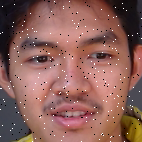

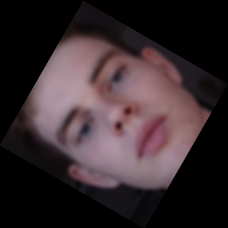


Testing images


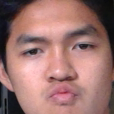

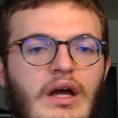

In [11]:
import IPython.display as display

print('Training images')
for n in range(2):
  image_path = random.choice(all_image_paths_train)
  #print('image path: ',image_path)
  display.display(display.Image(image_path))

print('\nTesting images')
for n in range(2):
  image_path = random.choice(all_image_paths_test)
  #print('image path: ',image_path)
  display.display(display.Image(image_path))

###Label images

In [12]:
label_names_0 = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names_1 = sorted(item.name for item in data_root_1.glob('*/') if item.is_dir())
label_names_2 = sorted(item.name for item in data_root_2.glob('*/') if item.is_dir())

label_names = label_names_0 + label_names_1 + label_names_2
label_names

['Guillaume_Loranchet', 'Guillaume_Paya', 'Miha_S', 'Nicholas_S']

In [13]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'Guillaume_Loranchet': 0, 'Guillaume_Paya': 1, 'Miha_S': 2, 'Nicholas_S': 3}

In [0]:
for name in label_names:
  stri = '/root/.keras/datasets/next_ite/' + name + '/.DS_Store'
  if stri in all_image_paths_test:
    all_image_paths_test.remove(stri)
  stri = '/root/.keras/datasets/next_ite/' + name + '/._.DS_Store'
  if stri in all_image_paths_test:
    all_image_paths_test.remove(stri)

In [15]:
all_image_labels_train = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_train]

print("First 10 labels indices of training set: ", all_image_labels_train[:10])

all_image_labels_test = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_test]

print("First 10 labels indices of training set: ", all_image_labels_test[:10])

all_image_labels_testing_test = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_testing_test]

print("First 10 labels indices of training set: ", all_image_labels_testing_test[:10])

First 10 labels indices of training set:  [1, 3, 2, 1, 3, 1, 1, 3, 0, 3]
First 10 labels indices of training set:  [1, 3, 3, 0, 3, 3, 1, 3, 3, 0]


###Load images with Tensor Flow

In [16]:
img_path = all_image_paths_train[0]
img_path

'/root/.keras/datasets/new_pic/Guillaume_Paya/Guillaume_Paya_41_sp_9_rot_anty_2.png'

In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])

  return image

def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

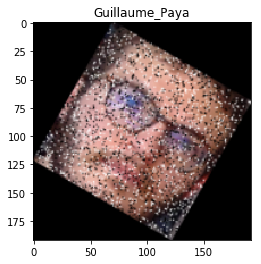

In [18]:
image_path = all_image_paths_train[0]
label = all_image_labels_train[0]

plt.imshow(load_and_preprocess_image(image_path)/255)
plt.grid(False)
#plt.xlabel(caption_image(img_path).encode('utf-8'))
plt.title(label_names[label].title())
print()

In [19]:
n_train = len(all_image_paths_train)

x_train_aux = [load_and_preprocess_image(all_image_paths_train[i]) for i in range(n_train)]
x_train_aux_2 = np.array([np.array(x_train_aux[i]) for i in range(n_train)])
x_train = x_train_aux_2 / 255   #normalize between 0 and 1

n_test = len(all_image_paths_test)

x_test_aux = [load_and_preprocess_image(all_image_paths_test[i]) for i in range(n_test)]
x_test_aux_2 = np.array([np.array(x_test_aux[i]) for i in range(n_test)])
x_test = x_test_aux_2 / 255   #normalize between 0 and 1

n_testing_test = len(all_image_paths_testing_test)

x_testing_test_aux = [load_and_preprocess_image(all_image_paths_testing_test[i]) for i in range(n_testing_test)]
x_testing_test_aux_2 = np.array([np.array(x_testing_test_aux[i]) for i in range(n_testing_test)])
x_testing_test = x_testing_test_aux_2 / 255   #normalize between 0 and 1
print(x_train.shape)
print(x_test.shape)
print(x_testing_test.shape)

n_test_abdel = len(image_paths_test_abdel)

x_test_abdel_aux = [load_and_preprocess_image(image_paths_test_abdel[i]) for i in range(n_test_abdel)]
x_test_abdel_aux_2 = np.array([np.array(x_test_abdel_aux[i]) for i in range(n_test_abdel)])
x_test_abdel = x_test_abdel_aux_2 / 255   #normalize between 0 and 1
print(x_test_abdel.shape)

y_train = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_train])
y_test = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_test])
y_testing_test = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_testing_test])
print(y_train.shape)
print(y_test.shape)
print(y_testing_test.shape)

labels = label_names
print(labels)

print(y_train[0])

(4140, 192, 192, 3)
(177, 192, 192, 3)
(9, 192, 192, 3)
(4140, 4)
(177, 4)
['Guillaume_Loranchet', 'Guillaume_Paya', 'Miha_S', 'Nicholas_S']
[0 1 0 0]


(4140, 4)


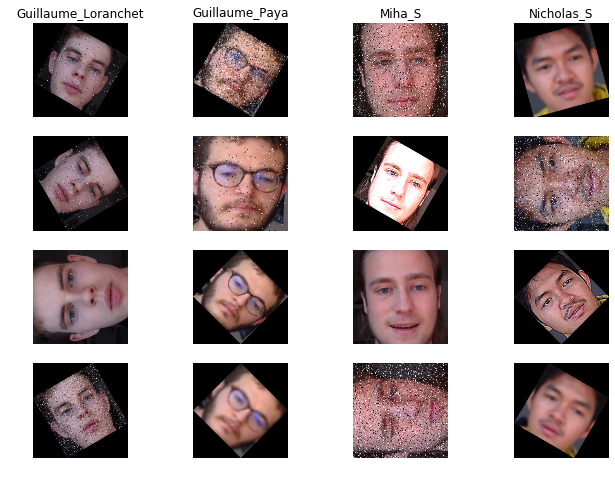

(177, 4)


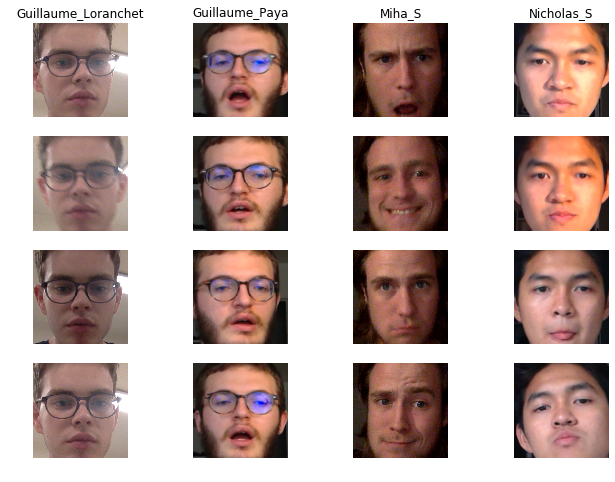

In [20]:
def show_first_n_images_in_categories(n, images, categories, labels, file_name=None):
    """Plots the first n images in each category from the image data."""
    f, axes = plt.subplots(n, len(categories[0]), figsize=(11,8))
    print(categories.shape)
    for i in range(len(categories[0])):
        count = 0
        j = 0
        while count < n and j < len(categories):
            #print(j,i)
            if categories[j][i] == 1:
                axes[count,i].imshow(images[j,:,:,:])
                axes[count,i].axis('off')
                if count == 0:
                    axes[count,i].set_title(labels[i])
                count += 1
            j += 1

    if file_name:
        plt.savefig(file_name)
    else:
        plt.show()

show_first_n_images_in_categories(4, x_train, y_train, labels)
show_first_n_images_in_categories(4, x_test, y_test, labels)
show_first_n_images_in_categories(4, x_testing_test, y_testing_test, labels)

##kNN Model

In [21]:
def euclidean_distance(ima_1,ima_2):
  return np.sqrt(sum(sum(sum((ima_1-ima_2)**2))))

print(euclidean_distance(x_train[0],x_train[1]))

67.8209141165287


In [22]:
def test(ima_test,label):
  print(label)
  x1, x2, x3, x4 = [],[],[],[]
  for i in range(0,100):
    if y_train[i][0]:
      x1.append(euclidean_distance(ima_test,x_train[i]))
    elif y_train[i][1]:
      x2.append(euclidean_distance(ima_test,x_train[i]))
    elif y_train[i][2]:
      x3.append(euclidean_distance(ima_test,x_train[i]))
    elif y_train[i][3]:
      x4.append(euclidean_distance(ima_test,x_train[i]))

  liste = [np.mean(x1),np.mean(x2),np.mean(x3),np.mean(x4)]
  return liste

#test(x_test[32],y_test[32])

[0 0 0 1]


[112.08630661386644, 105.35181644604243, 102.46180638095905, 108.0134963546706]

In [0]:
def average(liste):
  return sum(liste)/len(liste)

In [0]:
def clustering(x,y,k):
  nb_pers = len(y[0])  #4
  res = [[] for _ in range(nb_pers)]
  intermediate = [[] for _ in range(nb_pers)]
  
  for i in range(len(x)):
    for j in range(nb_pers):
      if len(intermediate[j]) == k:   #make groups of size k
        res[j].append(average(intermediate[j]))  
        intermediate[j] = []
    for j in range(nb_pers):
      if y[i][j]:   # i-th picture represent the j-th person in labels
        intermediate[j].append(x[i])
  for j in range(nb_pers):
    if len(intermediate[j]) != 0:
      res[j].append(average(intermediate[j])) 
  return res
        

A = clustering(x_train,y_train,100)

In [25]:
def try_mode(liste):
  '''check if there are more than 1 mode'''
  try:
    return mode(liste)
  except StatisticsError:
    return -1
  
B = [1,2,3]
try_mode(B)

-1

In [26]:
A = clustering(x_test,y_test,4)

def kNN(ima_input,A,k):  
  res_aux = {}
  for i in range(len(A)):
    for j in range(len(A[i])):
      res_aux[euclidean_distance(ima_input,A[i][j])] = i
        
  res = [value for (key,value) in sorted(res_aux.items())]   #take only the first k closest element
  #print(res)
  while try_mode(res[:k]) == -1:  #return the most frequent element
    k += 1
  return mode(res[:k])
  
  
def test_knn(x_test,y_test,A,k):
  '''output: accuracy'''
  res = 0
  for i in range(len(y_test)):
    val = kNN(x_test[i],A,k)
    if y_test[i][val]:
      res += 1
  return res/len(y_test)  


for i in range(1,10):
  print(i)
  print(test_knn(x_testing_test,y_testing_test,A,i))
  print('')


"\nfor i in range(1,10):\n  print(i)\n  print(test_knn(x_test,y_test,A,i))\n  print('')\n"

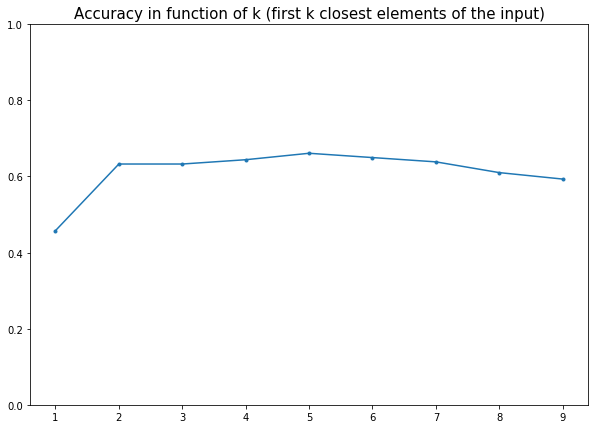

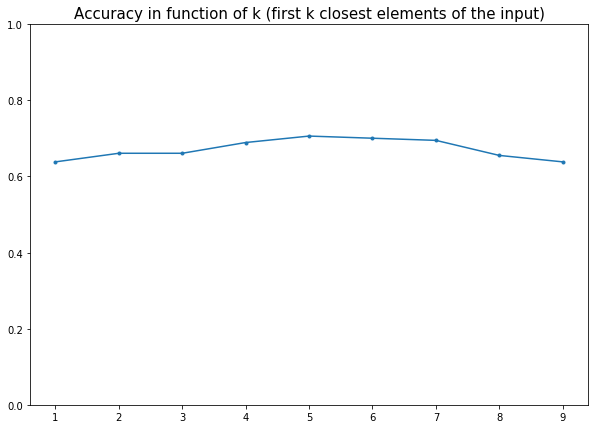

In [27]:
A = [0.4576271186440678, 0.632768361581921,0.632768361581921 ,0.6440677966101694 , 0.6610169491525424, 0.6497175141242938, 0.6384180790960452,0.6101694915254238 , 0.5932203389830508]
C = [i for i in range(1,10)]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.title('Accuracy in function of k (first k closest elements of the input)',fontsize=15)
plt.ylim([0,1])
plt.show()

A = [0.6384180790960452, 0.6610169491525424, 0.6610169491525424, 0.6892655367231638, 0.7062146892655368, 0.7005649717514124, 0.6949152542372882, 0.655367231638418, 0.6384180790960452]
C = [i for i in range(1,10)]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.title('Accuracy in function of k (first k closest elements of the input)',fontsize=15)
plt.ylim([0,1])
plt.show()

In [0]:
n = len(y_testing_test)

def test_plot(liste = [1,2,3,4,5,6,7,8,10,12,15]):
  for i in liste:
    A = clustering(x_test,y_test,i)
    def test_time():
      print('Cluster of {} elements'.format(i))
      print('Accuracy: ',test_knn(x_testing_test,y_testing_test,A,5))

    print('Time to predict each picture',timeit.timeit(test_time,number=1)/n,'\n')
    
test_plot()

def test_plot_v2(x_train,y_train,x_test,y_test,liste,k):
  res = [0 for _ in range(len(liste))]
  j = 0
  for i in liste:
    A = clustering(x_train,y_train,i)
    accuracy = test_knn(x_test,y_test,A,k)
    res[j] = accuracy
    j += 1
  return res

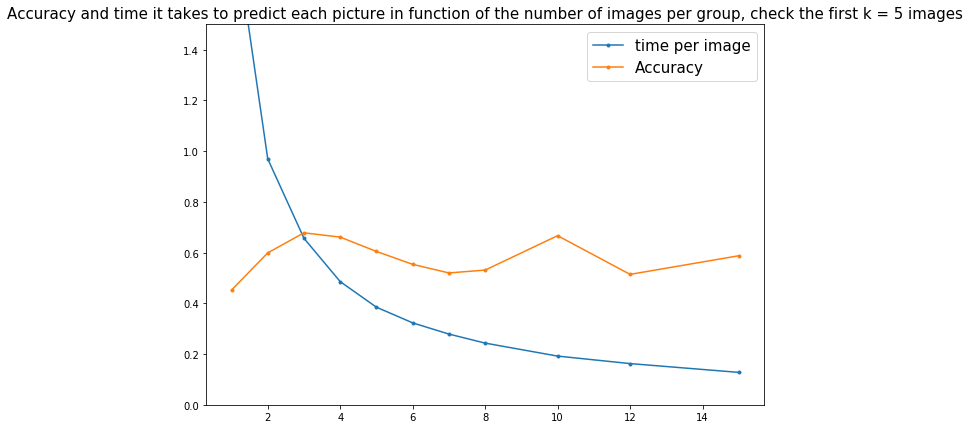

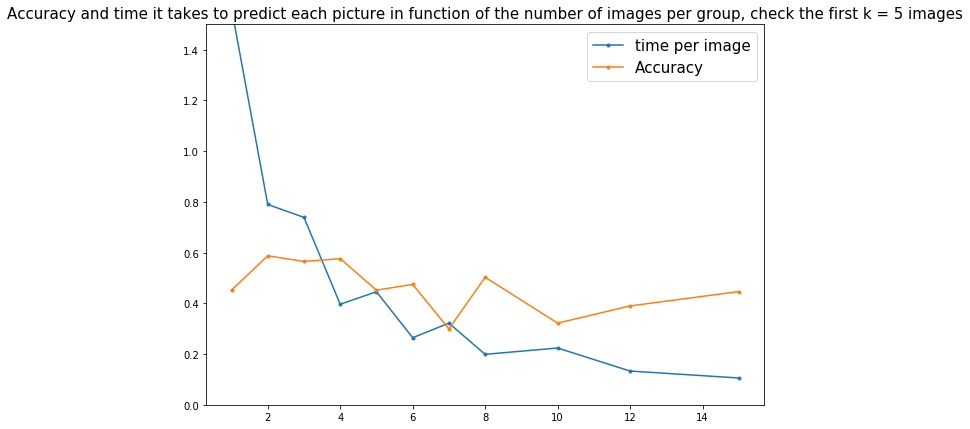

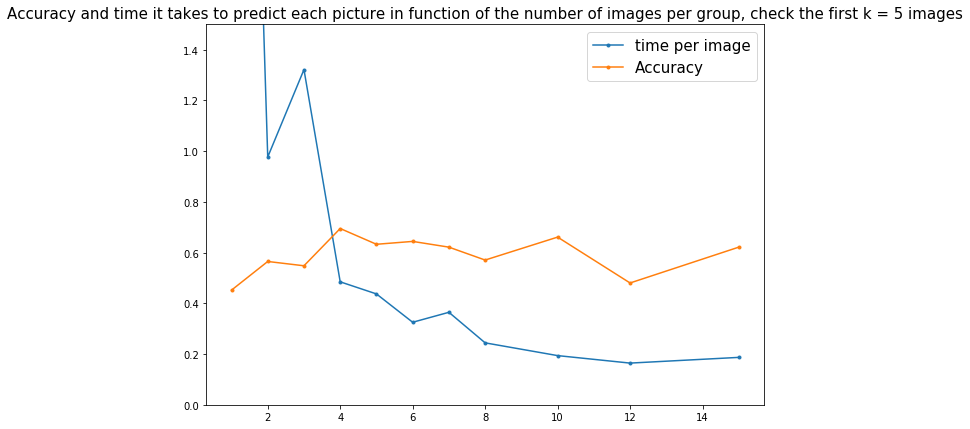

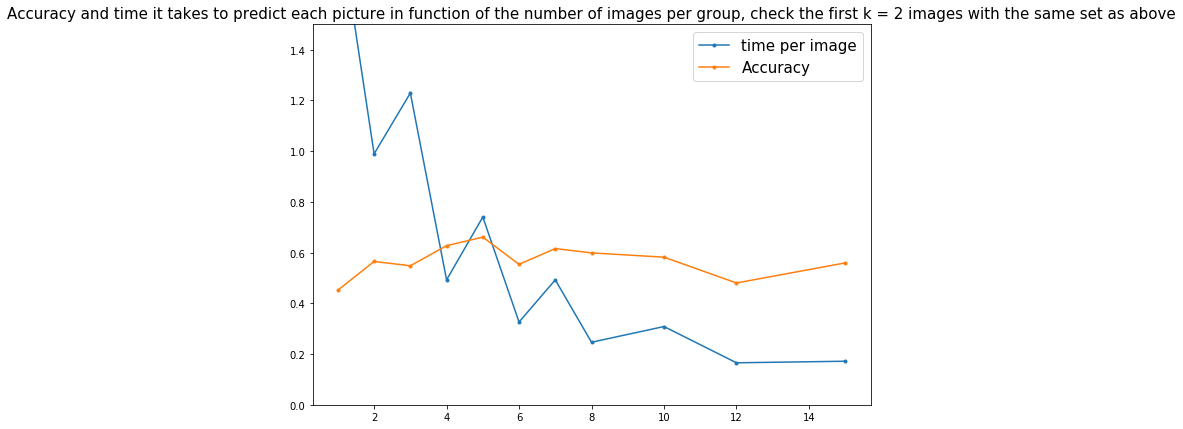

In [29]:
A = [1.9556941677344652,0.9695916148757019,0.6562474537514149,0.48557390805649575,0.3847716027118679,0.32295399453672524,0.27883983207344387,0.24320527823164087, 0.1919944706892675 ,0.16246278505084485  , 0.12778141203954752 ]
B = [0.4519774011299435,0.5988700564971752,0.6779661016949152,0.6610169491525424,0.6045197740112994,0.5536723163841808 ,0.519774011299435,0.5310734463276836 ,0.6666666666666666 ,0.5141242937853108 , 0.5875706214689266]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.plot(C,B,marker='.')
plt.title('Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 5 images',fontsize=15)
plt.legend(('time per image','Accuracy'),loc='best',fontsize=15)
plt.ylim([0,1.5])
plt.show()

A = [1.5631840424519776,0.7896613351468931 ,0.7388307934406788 , 0.3963731183954804 ,0.4456509903672313 ,0.26446220867796655 ,0.3217400533559327 ,0.1989596205762712 ,0.2238477530395486 ,0.13305251205649724 ,0.10575665348587636 ]
B = [0.4519774011299435,0.5875706214689266,0.5649717514124294,0.576271186440678,0.4519774011299435,0.4745762711864407,0.2994350282485876,0.5028248587570622,0.3220338983050847,0.3898305084745763,0.4463276836158192]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.plot(C,B,marker='.')
plt.title('Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 5 images',fontsize=15)
plt.legend(('time per image','Accuracy'),loc='best',fontsize=15)
plt.ylim([0,1.5])
plt.show()

A = [5.509470149999999,0.9767672461638421 ,1.3214222332033896 ,0.4847251269265539 ,0.43708202742372726 ,0.32536828557627134 ,0.3646449667118636 ,0.2441796150169492 ,0.1939253001242925 ,0.1643949571977422 ,0.18692199483615757 ]
B = [0.4519774011299435,0.5649717514124294,0.5480225988700564,0.6949152542372882,0.632768361581921,0.6440677966101694,0.6214689265536724,0.5706214689265536,0.6610169491525424,0.480225988700565,0.6214689265536724]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.plot(C,B,marker='.')
plt.title('Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 5 images',fontsize=15)
plt.legend(('time per image','Accuracy'),loc='best',fontsize=15)
plt.ylim([0,1.5])
plt.show()

A = [1.9345539544124293,0.9893024473559323,1.2290385608757062,0.4926231926723159 ,0.7401058078813552,0.326265965728814,0.49248329315819217,0.24658806461581925,0.30851309332768395,0.16557568342372855,0.17173665325988668]
B = [0.4519774011299435,0.5649717514124294,0.5480225988700564,0.6271186440677966,0.6610169491525424,0.5536723163841808,0.615819209039548,0.5988700564971752,0.5819209039548022,0.480225988700565,0.559322033898305]
C = [i for i in range(1,9)]+[10,12,15]

plt.figure(figsize=(10,7))
plt.plot(C,A,marker='.')
plt.plot(C,B,marker='.')
plt.title('Accuracy and time it takes to predict each picture in function of the number of images per group, check the first k = 2 images with the same set as above',fontsize=15)
plt.legend(('time per image','Accuracy'),loc='best',fontsize=15)
plt.ylim([0,1.5])
plt.show()

In [34]:
def test_average_accuracy(k):
  print(all_image_paths_testing_test[:3])
  random.shuffle(all_image_paths_testing_test)
  print(all_image_paths_testing_test[:3],'\n')

  random.shuffle(all_image_paths_test)
  
  all_image_labels_testing_test = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_testing_test]

  all_image_labels_test = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths_test]
  
  n_testing_test = len(all_image_paths_testing_test)

  x_testing_test_aux = [load_and_preprocess_image(all_image_paths_testing_test[i]) for i in range(n_testing_test)]
  x_testing_test_aux_2 = np.array([np.array(x_testing_test_aux[i]) for i in range(n_testing_test)])
  x_testing_test = x_testing_test_aux_2 / 255   #normalize between 0 and 1

  n_test = len(all_image_paths_test)

  x_test_aux = [load_and_preprocess_image(all_image_paths_test[i]) for i in range(n_test)]
  x_test_aux_2 = np.array([np.array(x_test_aux[i]) for i in range(n_test)])
  x_test = x_test_aux_2 / 255   #normalize between 0 and 1

  y_testing_test = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_testing_test])
  y_test = np.array([[0]*i + [1] + [0]*(len(label_names)-1-i) for i in all_image_labels_test])

  accuracy = test_plot_v2(x_test,y_test,x_testing_test,y_testing_test,[3,4,5],k)
  
  return accuracy

n = 5
k = 5
accu= [] 

for _ in range(n):
  accu.append(test_average_accuracy(k))
  
print(accu)

['/root/.keras/datasets/new_pic/Guillaume_Loranchet/Guillaume_Loranchet_58_blurred_3_rot_clock_2.png', '/root/.keras/datasets/new_pic/Guillaume_Loranchet/Guillaume_Loranchet_46_sharpened_2_7.png', '/root/.keras/datasets/new_pic/Guillaume_Paya/Guillaume_Paya_17_sharpened_1_9_rot_anty_1.png']
['/root/.keras/datasets/new_pic(2)/Nicholas_S/Nicholas_72_sp_1.png', '/root/.keras/datasets/new_pic(2)/Nicholas_S/Nicholas_48_blurred_2.png', '/root/.keras/datasets/new_pic(1)/Miha_S/Miha_S_78_sp_9_rot_anty_5.png'] 

['/root/.keras/datasets/new_pic(2)/Nicholas_S/Nicholas_72_sp_1.png', '/root/.keras/datasets/new_pic(2)/Nicholas_S/Nicholas_48_blurred_2.png', '/root/.keras/datasets/new_pic(1)/Miha_S/Miha_S_78_sp_9_rot_anty_5.png']
['/root/.keras/datasets/new_pic/Guillaume_Loranchet/Guillaume_Loranchet_25_blurred_9_rot_clock_2.png', '/root/.keras/datasets/new_pic/Guillaume_Loranchet/Guillaume_Loranchet_10_sp_3.png', '/root/.keras/datasets/new_pic(2)/Nicholas_S/Nicholas_82.png'] 

['/root/.keras/datasets

KeyboardInterrupt: ignored

In [31]:
print("Average accuracy for clusters of size 3: ", 0.6779661016949152)
print("Average accuracy for clusters of size 4: ", 0.6610169491525424)
print("Average accuracy for clusters of size 5: ", 0.6045197740112994)

print("Average accuracy for clusters of size 4: ", 0.6892655367231638)
print("Average accuracy for clusters of size 5: ", 0.5536723163841808)

Average accuracy for clusters of size 3:  0.6779661016949152
Average accuracy for clusters of size 4:  0.6610169491525424
Average accuracy for clusters of size 5:  0.6045197740112994
Average accuracy for clusters of size 4:  0.6892655367231638
Average accuracy for clusters of size 5:  0.5536723163841808


In [32]:
x_test_abdel

A = clustering(x_train,y_train,4)
B = clustering(x_test,y_test,4)


def test_abdel(x_test_abdel,A,k=5):
  '''output: accuracy'''
  res = []
  for i in range(len(x_test_abdel)):
    val = kNN(x_test_abdel[i],A,k)
    res.append(val)
  return res

res = test_abdel(x_test_abdel,A,k=5)
print(res)

for i in range(len(labels)):
  print('{} appears {} times'.format(labels[i],res.count(i)))
  
res = test_abdel(x_test_abdel,B,k=5)
print(res)

for i in range(len(labels)):
  print('{} appears {} times'.format(labels[i],res.count(i)))

array([[[[0.24705882, 0.2       , 0.12156863],
         [0.23153596, 0.18063726, 0.11372549],
         [0.21977125, 0.16143791, 0.10980392],
         ...,
         [0.41960785, 0.3647059 , 0.2784314 ],
         [0.4426472 , 0.3681374 , 0.30539227],
         [0.43153578, 0.35702598, 0.29419926]],

        [[0.25882354, 0.19215687, 0.11764706],
         [0.27410644, 0.21127962, 0.12901008],
         [0.22465959, 0.18070534, 0.09083265],
         ...,
         [0.40432498, 0.35326287, 0.25530535],
         [0.42808414, 0.3574959 , 0.26729983],
         [0.44714037, 0.35694426, 0.27066976]],

        [[0.28202614, 0.19591503, 0.14493464],
         [0.29771242, 0.20375817, 0.14509805],
         [0.28549156, 0.19921024, 0.1402301 ],
         ...,
         [0.4117749 , 0.37231413, 0.2389808 ],
         [0.43089598, 0.36407274, 0.24626233],
         [0.45139885, 0.3650461 , 0.25916377]],

        ...,

        [[0.29730392, 0.38406864, 0.51348037],
         [0.30779207, 0.38423714, 0.5364482 ]